-------------
# Chapter 6 - CAPM & APT
----------

In [32]:
using JuMP, HiGHS, Ipopt, Plots;

------
#### 1 
Let us assume a normal distribution of returns and risk-averse utility functions. Under what
conditions will all investors demand the same portfolio of risky assets?

--------
#### 2
The following data have been developed for the Donovan Company, the manufacturer of an
advanced line of adhesives:

| State | Probability | Market Return $R_m$ | Return for the Firm $R_j$ |
| --- | --- | --- | --- |
| 1 | .1 | −.15 | −.30 |
| 2 | .3 | .05 |.00 |
| 3 | .4 | .15 |.20 |
| 4 | .2 | .20 |.50 |


The risk-free rate is 6%. Calculate the following:

(a) The expected market return.

(b) The variance of the market return.

(c) The expected return for the Donovan Company.

(d) The covariance of the return for the Donovan Company with the market return.

(e) Write the equation of the security market line.

(f) What is the required return for the Donovan Company? How does this compare with its expected return?

In [92]:
P = [.1 .3 .4 .2]
Rm = [-.15 .05 .15 .2]
Rj = [-.3 0 .2 .5]
Rf = .06

ERm = P*Rm'
var_Rm = P*(Rm.-ERm)'.^2
ERj = P*Rj'
cov_mj = P*diag((Rm.-ERm)'*(Rj.-ERj))
Beta = cov_mj/var_Rm

@printf("Expectation of Market Return: %.2f \nExpectation of Firm Return: %.2f", ERm[1], ERj[1])
@printf("\nVariance of Market Return: %.2f \nVariance of Firm Return: %.4f \nCovariance of Market & Firm: %.4f", var_Rm[1], var_Rj[1], cov_mj[1])
@printf("\nBeta of Firm: %.2f", Beta[1])

Expectation of Market Return: 0.10 
Expectation of Firm Return: 0.15
Variance of Market Return: 0.01 
Variance of Firm Return: 0.0525 
Covariance of Market & Firm: 0.0215
Beta of Firm: 2.15

Equation of the SML: 
$$
\begin{align*}
E[R_j] &= R_f + \beta_i \left(E\left[R_m\right] - R_f\right) \\
&= 0.06 + \beta_i \left(0.1 - 0.06\right) \\
&= 0.06 + 0.04 \cdot \beta_i
\end{align*}
$$

$$\begin{align*}
    E[R_j] &= R_f + \beta_j \left(E\left[R_m\right] - R_f\right) \\
    &= 0.06 + 2.15\left(0.1 - 0.06\right) \\
    &= 0.06 + 2.15\left(0.1 - 0.06\right) \\
    &= 0.146
\end{align*}$$

This is below our Expected Return of 0.15. This implies the firm is undervalued & we should therefore purchase stocks of this security.

--------------
#### 3

The following data have been developed for the Milliken Company:

| Year | Market Return | Company Returns |
| --- | --- | --- |
| 1978 | .27 | .25 |
| 1977 | .12 | .05 |
| 1976 | −.03 | −.05
| 1975 | .12 | .15 |
| 1974 | −.03 | −.10
| 1973 | .27 | .30 |

The yield to maturity on Treasury bills is .066 and is expected to remain at this point for the
foreseeable future. Calculate the following:

(a) The expected market return.

(b) The variance of the market return.

(c) The expected rate of return for the Milliken Company.

(d) The covariance of the return for the Milliken Company with the return on the market.

(e) Write the equation of the security market line.

(f) What is the required return for the Milliken Company?

In [91]:
R_m = [.27 .12 -.03 .12 -.03 .27]
ER_m = 1/length(R_m)*R_m*ones(6)

var_m = repeat([1/length(R_m)], length(R_m))'*diag((R_m.-ER_m)'*(R_m.-ER_m))

R_j = [.25 .05 -.05 .15 -.1 .3]
ER_j = 1/length(R_j)*R_j*ones(6)

cov_mj = repeat([1/length(R_m)], length(R_m))'*diag((R_m.-ER_m)'*(R_j.-ER_j))

@printf("Expectation of Market Return: %.2f \nExpectation of Milliken Return: %.2f", ER_m[1], ER_j[1])
@printf("\nVariance of Market Return: %.2f \nCovariance of Market & Milliken: %.4f", var_m[1], cov_mj[1])

Expectation of Market Return: 0.12 
Expectation of Milliken Return: 0.10
Variance of Market Return: 0.01 
Covariance of Market & Milliken: 0.0175

Equation of the SML: 
$$
\begin{align*}
E[R_j] &= R_f + \beta_i \left(E\left[R_m\right] - R_f\right) \\
&= 0.066 + \beta_i \left(0.12 - 0.066\right) \\
&= 0.066 + 0.054 \cdot \beta_i
\end{align*}
$$

In [94]:
var_j = repeat([1/length(R_j)], length(R_j))'*diag((R_j.-ER_j)'*(R_j.-ER_j))
Beta = var_j/cov_mj

1×1 transpose(::Vector{Float64}) with eltype Float64:
 1.0077519379844964

Required Return on Milliken:
$$
\begin{align*}
E\left[R_j\right] &= 0.066 + 0.054 \cdot \beta_i \\
&= 0.066 + 0.054 \cdot 1.00775 \\
&= 0.1204
\end{align*}
$$

Implies Milliken currently overvalued, so we would expect price to fall.

----------
#### 4

For the data in Table Q4 perform the indicated calculations.

| | $P_t$ | $\frac{P_t}{P_{t-1}}-1$ | $\frac{Div_t}{P_t}$ | $R_{mt}$ | $R_{mt}-\bar{R}_m$ | $(R_{mt}-\bar{R}_m)^2$ | $R_f$ |
| --- | --- | --- | --- | --- | --- | --- |--- |
| 1960 | 55.84 |
| 1961 | 66.27 | 0.1868 | .0298 | 0.2166 | 0.1386 | 0.0192 |.03 |
| 1962 | 62.38 | -0.0587 | .0337 | -0.025 | -0.103 | 0.0106 |.03 |
| 1963 | 69.87 | 0.12 | .0317 | 0.1518 | 0.074 | 0.0054 |.03 |
| 1964 | 81.37 | 0.1646 | .0301 | 0.1947 | 0.1167 | 0.0136 |.04 |
| 1965 | 88.17 | 0.0836 | .0300 | 0.1136 | 0.0356 | 0.0013 |.04 |
| 1966 | 85.26 | -0.033 | .0340 | 0.001 | -0.077 | 0.0059 |.04 |
| 1967 | 91.93 | 0.0782 | .0320 | 0.1102 | 0.0323 | 0.001 |.05 |
| 1968 | 98.70 | 0.0736 | .0307 | 0.1043 | 0.0264 | 0.0007 |.05 |
| 1969 | 97.84 | -0.0087 | .0324 | 0.0237 | -0.0543 | 0.0029 |.07 |
| 1970 | 83.22 | -0.1494 | .0383 | -0.1111 | 0.1891 | 0.0358 |.06 |

a. $\bar{R}_m$ = 0.0457

b. $VAR(R_m)$ = 0.00965

c. $σ(R_m)$ = 0.0982

In [121]:
P = [55.84 66.27 62.38 69.87 81.37 88.17 85.26 91.93 98.7 97.84 83.22]

Price_Ret = zeros(length(P)-1)
for i in 1:length(P)-1
    Price_Ret[i] = P[i+1]/P[i]-1
end

Div = [.0298 .0337 .0317 .0301 .03 .034 .032 .0307 .0324 .0383]'
Ret = Price_Ret+Div

mean_Ret = mean(Ret)

Ret_dev = Ret.-mean_Ret
Mkt_var = (Ret.-mean_Ret).^2

var = repeat([1/10], 10)'*(Ret+Div.-mean(Ret+Div)).^2
sd = sqrt.(var)

1×1 Matrix{Float64}:
 0.09601435087790917

----------
#### 6
What are the assumptions sufficient to guarantee that the market portfolio is an efficient
portfolio?


Other than the usual perfect market assumptions, and given that we have rational, risk-averse,
expected-end-of-period-utility-of-wealth maximizers, the key assumptions are that 
1) investors have homogeneous expectations 

2) all assets are perfectly divisible and marketable.

It is not necessary that there be risk-free assets. Given the two above assumptions, all individuals will perceive the same efficient set and all assets will be held in equilibrium. If every individual holds an efficient portfolio, and all assets are held, then the market portfolio must also be efficient because it is merely the sum of all efficient portfolios held by all individuals.

-----------
#### 7 
In the CAPM is there any way to identify the investors who are more risk averse? Explain.
How would your answer change if there were not a riskless asset?


We can identify risk-averse investors by the amount of their investment held in the risk-free asset. We could also judge their risk-aversity by looking at the $\beta$ of their portfolio or the required rate of return on their portfolio as these are all equivalent measures.


If there were not a riskless asset, we can constuct a zero-$\beta$ portfolio through a combination of risky-assets such that it's correlation with the market portfolio would be zero. We could then identify risk-averse investors by the $\beta$ of their portfolio,

--------
#### 8
Given risk-free borrowing and lending, efficient portfolios have no unsystematic risk. True or
false? Explain.


This statement would only be true of we had an infinite or pseudo-infinite number of marketable securities, where the assets have non-perfect correlation.

Systematic risk is defined as market risk, i.e., a portfolio’s variance that can be explained in terms of
market variance. With risk-free borrowing and lending, all efficient portfolios are linear combinations
of the risk-free asset and the market portfolio. The capital market line is made up of a linear efficient
set as in Figure 6.2. Because the risk-free asset has no variance, total variance in every efficient
portfolio is contributed solely by the market portfolio. Thus, all risk is systematic.
Algebraically, the variance in any efficient portfolio would be:
$$
\begin{align*}
var\left[a(R_m)+(1-a)R_f\right] &= a^2 \sigma^2_{m}+(1-a)^2 \sigma^2_{R_f} + a(1-a)\sigma_{m, R_f} \\
&= a^2 \sigma^2_{m}
\end{align*}
$$

where a represents the percentage of the efficient portfolio invested in the market portfolio. The
percentage, a, is equal to the portfolio’s β p, as proven in problem 6.7. β is the measure of systematic
risk.
Thus, $σ_p=β_p σ_m$.

---------
#### 9
What is the beta of an efficient portfolio with $E(R_j) = 20\%$ if $R_f = 5\%$, $E(R_m) = 15\%$, and $σ_m = 20\%$? 

What is its $σ_j$? 

What is its correlation with the market?


In [15]:
E_Rm = 0.15
E_Rj = 0.2
R_f = 0.05
sigma_m = 0.2

B = (E_Rj-R_f)/(E_Rm-R_f)

sigma_j = B*sigma_m

cov_mj = B*sigma_m^2

rho_mj = cov_mj/(sigma_j*sigma_m)

1.0000000000000002

$$
\begin{align*}
E\left[R_j\right] &= R_f + \beta_j \left[E[R_m]-R_f\right] \\
20\% &= 5\% + \beta_j [15\%-5\%] \\
\beta_j &= \frac{15\%}{10\%} \\
\beta_j &= 1.5
\\
\\
\sigma_{j} &=  \beta_j \sigma_{m} \\
&= 1.5(20\%) \\
&= 30\%
\\
\\
\beta_{j} &=  \frac{cov(R_m, R_j)}{\sigma^2_{m}} \\
\implies cov(R_m, R_j) &= \beta_j(\sigma^2_m) \\
&= 1.5(0.2)^2 \\
&= 6\%
\\
\\
\rho_{m,j} &=  \frac{cov(R_m, R_j)}{\sigma_m \sigma_j} \\
&= \frac{6\%}{20\% \cdot 30\%} \\
&= 1
\end{align*}
$$

Implies that all efficient portfolios are perfectly correlated with the market portfolio.

---------- 
#### 10
Given the facts of Problem 9, and that the common stock of the Rapid Rolling Corporation has $E(R_k) = 25\%$ and $σ^2_k = 52\%$, what is the systematic risk of the common stock? What is its unsystematic risk?


In [8]:
E_Rm = 0.15
E_Rk = 0.25
R_f = 0.05
sigma_m = 0.2
sigma2_k = 0.52

B = (E_Rk-R_f)/(E_Rm-R_f)

sigma_mk = B*sigma_m

sigma_ek = sqrt(sigma2_k - sigma_mk^2)

[B sigma_mk sigma_ek]

1×3 Matrix{Float64}:
 2.0  0.4  0.6

$$
\begin{align*}
E\left[R_k\right] &= R_f + \beta_k \left[E[R_m]-R_f\right] \\
25\% &= 5\% + \beta_k [15\%-5\%] \\
\beta_k &= \frac{20\%}{10\%} \\
\beta_k &= 2
\\
\\
\sigma^2_{m,k} &= \beta_k \sigma_m \\
&= 2(20\%) \\
&= 40\%
\\
\\
\sigma^2_{k} &= \beta_k^2 \sigma_m^2 + \sigma^2_{\epsilon,k} \\
\implies \sigma^2_{\epsilon,k} &= \sigma^2_{k} - \beta_k^2 \sigma_m^2 \\
\sigma^2_{\epsilon,k} &= 52\% - 2^2(20\%)^2 \\
&= 52\%-16\% \\
&= 0.36
\\
\\
\implies \sigma_{\epsilon,k} &= 60\%
\end{align*}
$$

------------
#### 11
(a) If the expected rate of return on the market portfolio is 14% and the risk-free rate is
6%, find the beta for a portfolio that has expected rate of return of 10%. What assumptions
concerning this portfolio and/or market conditions do you need to make to calculate the
portfolio’s beta?

(b) What percentage of this portfolio must an individual put into the market portfolio in
order to achieve an expected return of 10%?

$$
\begin{align*}
E\left[R_k\right] &= R_f + \beta_k \left[E[R_m]-R_f\right] \\
10\% &= 6\% + \beta_k [14\%-6\%] \\
\beta_k &= \frac{4\%}{8\%} \\
\beta_k &= 0.5
\end{align*}
$$

The CAPM assumes that the market is in equilibrium and that investors hold efficient portfolios, i.e., that all portfolios lie on the security market line.

As the $\beta$ of the market portfolio is 1, we know that an investor must put 50\% of their portfolio into the market portfolio in order to achieve an expected return of 10\% 

-----------
#### 12 
You believe that the Beta Alpha Watch Company will be worth $100 per share one year from
now. How much are you willing to pay for one share today if the risk-free rate is 8%, the expected
rate of return on the market is 18%, and the company’s beta is 2.0?


In [3]:
P1 = 100
E_Rm = 0.18
B = 2
R_f = 0.08

E_Ri = R_f+B*(E_Rm-R_f)

P0 = P1/(1+E_Ri)

[E_Ri P0]

1×2 Matrix{Float64}:
 0.28  78.125

$$
\begin{align*}
E\left[R_i\right] &= R_f + \beta_k \left[E[R_m]-R_f\right] \\
&= 8\% + 2[18\%-8\%] \\
&= 8\%+20\% \\
&= 28\%
\\
\\
\frac{100}{P_0}-1 &= 28\% \\
\implies P_0 &= \frac{100}{128\%} \\
&=  \$78.125
\end{align*}
$$

----------
#### 13
Given the following variance-covariance matrix and expected returns vector (for assets X
and Y , respectively) for a two-asset world:
$$
∑ = \left[\begin{array}{cc}
.01 & 0 \\ 0 & .0064
\end{array}\right]
$$
$$
\bar{R}^′_I = \left[\begin{array}{cc}
.2 & .1
\end{array}\right]
$$


(a) What is the expected return of a zero-beta portfolio, given that 50% of the index portfolio is invested in asset X and asset Y ?

(b) What is the vector of weights in the global minimum-variance portfolio?

(c) What is the covariance between the global minimum-variance portfolio and the zero- beta portfolio?

(d) What is the equation of the market line?


In [85]:
sigma = [0.01 0; 0 0.0064]
mean_R = [0.2 0.1]

h_m = [0.5 0.5]
ER_m = h_m*mean_R'

1×1 Matrix{Float64}:
 0.15000000000000002

In [87]:
opt = Model(Ipopt.Optimizer)
@variable(opt,h)
@NLconstraint(opt, h*sigma[1,1]*h_m[1] + (1-h)*sigma[2,2]*h_m[2]== 0)
set_silent(opt)
optimize!(opt)
h_z=[value.(h) 1-value.(h)]

cov_z =h_z*sigma*h_m'

E_Rz = h_z*mean_R'

1×1 Matrix{Float64}:
 -0.07777777777777783

In [88]:
opt = Model(Ipopt.Optimizer)
@variable(opt,h)
@NLobjective(opt, Min, h^2*sigma[1,1] + (1-h)^2*sigma[2,2] + 2*h*(1-h)*sigma[1,2])
set_silent(opt)
optimize!(opt)

h_MVP=[value.(h) 1-value.(h)]

1×2 Matrix{Float64}:
 0.390244  0.609756

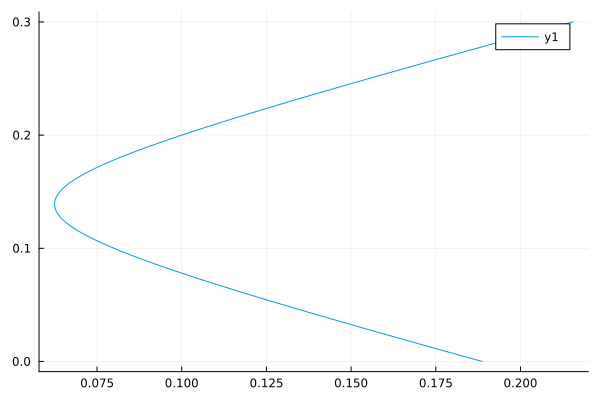

In [70]:
h=zeros(301)
h[1] = -1
for i in 2:length(h)
    h[i] = h[i-1]+3/(length(h)-1)
end

mean_h = [h'; (1 .-h)']'*mean_R'
sd_h = sqrt.(h.^2 .*sigma[1,1] + (1 .-h).^2 .*sigma[2,2])

plot(sd_h, mean_h)

In [77]:
cov_MVP_z = h_MVP*sigma*h_z'

1×1 Matrix{Float64}:
 0.0039024390243902426

$$
\begin{align*}
E[R_j] &= E[R_z]+\beta_j \left[E[R_m] - E[R_z] \right] \\
&= -7.778\% + \beta_j \left[15\% +7.778\% \right] \\
&= -7.778\% + 22.778\% \cdot \beta_j
\end{align*}
$$

----------
#### 14 
Given the following variance-covariance matrix, calculate the covariance between portfolio A, which has 10% in asset 1 and 90% in asset 2, and portfolio B, which has 60% in asset 1 and 40% in asset 2:
$$
∑ = \left[\begin{array}{cc}
.01 & -.02 \\ -.02 & .04
\end{array}\right]
$$

In [90]:
sigma = [0.01 -0.02; -0.02 0.04]
h_A = [0.1 0.9]
h_B = [0.6 0.4]

cov_AB = h_A*sigma*h_B'

1×1 Matrix{Float64}:
 0.003400000000000001

-------------
#### 15

Suppose that securities are priced as if they are traded in a two-parameter economy. You have
forecast the correlation coefficient between the rate of return on Knowlode Mutual Fund and the
market portfolio at .8. Your forecast of the standard deviations of the rates of return are .25 for
Knowlode, and .20 for the market portfolio. How would you combine the Knowlode Fund and a
riskless security to obtain a portfolio with a beta of 1.6?

In [93]:
r_Km = 0.8
sd_K = 0.25
sd_m = 0.2

cov_Km = sd_K*sd_m*r_Km
B_K = cov_Km/sd_m^2

1.0

As the $\beta$ of Knowlode is 1, in order to obtain a portfolio with a $\beta$ of 1.6, we must lend 0.6 units at the risk-free rate & invest 1.6 units in Knowlode.

--------
#### 16
You currently have 50% of your wealth in a risk-free asset and 50% in the four assets below:

| Asset | ER on Asset i (%) | $β_i$ | % Invested in Asset i|
| --- | --- | --- | --- |
| i = 1 | 7.6  | .2 | 10 |
| i = 2 | 12.4 | .8 | 10 |
| i = 3 | 15.6 | 1.2 | 10 |
| i = 4 | 18.8 | 1.6 | 20 |

If you want an expected rate of return of 12%, you can obtain it by selling some of your holdings
of the risk-free asset and using the proceeds to buy the equally weighted market portfolio. If this
is the way you decide to revise your portfolio, what will the set of weights in your portfolio be? 

If you hold only the risk-free asset and the market portfolio, what set of weights would give you an
expected 12% return?


$$
\begin{align*}
E[R_i] &= R_f +\beta_i\left[E[R_m]-R_f\right] 
\\ \\
E[R_1] &= R_f +\beta_1\left[E[R_m]-R_f\right] \\
7.6\%&= R_f +0.2\left[E[R_m]-R_f\right] 
\\ \\
E[R_2] &= R_f +\beta_2\left[E[R_m]-R_f\right] \\
12.4\%&= R_f +0.8\left[E[R_m]-R_f\right] \\
\implies 7.6\% &= R_f +0.8\left[E[R_m]-R_f\right] -4.8\% 
\\ \\
\implies R_f +0.2\left[E[R_m]-R_f\right]  &= R_f +0.8\left[E[R_m]-R_f\right] -4.8\% \\
0.2 E[R_m]-0.2 R_f &= 0.8 E[R_m]-0.8 R_f -4.8\% \\
0.6 R_f &= 0.6 E[R_m] -4.8\% \\
R_f &= E[R_m] -8\%
\\ \\
12.4\% &= E[R_m] -8\%+0.8[8\%] \\
\implies E[R_m] &= 12.4\%+1.6\% \\
\\
\implies E[R_m] &= 14\% \\
\implies R_f &= 6\%
\end{align*}
$$

In [183]:
h = [0.5 0.1 0.1 0.1 0.2]
B = [0 0.2 0.8 1.2 1.6]
B_risk = 2*h[2:5]'*B[2:5]

B_p = h*B'
R_f = 0.06
E_Rm = 0.14

R = [R_f 0.076 0.124 0.156 0.188]

E_Rnew = 0.12
B_new = (E_Rnew-R_f)/(E_Rm-R_f)

h_risk = B_new/B_risk

change_h_risk = h_risk-0.5
#(1-h_risk)*R_f.+(1 +(h_risk-0.5)/0.5).*h[2:5]'*R[2:5]

0.1944444444444442

If we just readjust with current proportions in each of the risky assets we must sell off 19.44% of our holdings in the risk-free asset & reinvest in risky assets. (not asked for in question)

In [184]:
h_mkt = B_new-0.5*B_risk
#h_mkt*E_Rm.+[0.5-h_mkt 0.1 0.1 0.1 0.2]*R'

0.20999999999999974

Must sell off 21\% of our holdings in risk-free asset and reinvest in market portfolio to obtain expected returns of 12\%.

In [190]:
opt = Model(Ipopt.Optimizer)
@variable(opt,h_m)
@NLconstraint(opt, (1-4*h_m)*R[1]+h_m*R[2]+h_m*R[3]+h_m*R[4]+h_m*R[5] == 0.12)
set_silent(opt)
optimize!(opt)

h_new=[1-4*value.(h_m) value.(h_m) value.(h_m) value.(h_m) value.(h_m)]

#h_new*R'

1×5 Matrix{Float64}:
 0.210526  0.197368  0.197368  0.197368  0.197368

So if we are investing solely in the risk-free asset and an equally-weighted market portfolio, to obtain an expected return of 12\% we would adjust our holdings of the risl-free asset to be 21.05\% of our total wealth, & invest 19.74\% in each of the other 4 assets on the market.

------------
#### 17
The market price of a security is \$40, the security’s expected rate of return is 13%, the riskless rate of interest is 7%, and the market risk premium, $\left[E(R_m) − R_f\right]$, is 8%. What will be
the security’s current price if its expected future payoff remains the same but the covariance of its
rate of return with the market portfolio doubles?


In [199]:
P0 = 40
ER_i = 0.13
R_f = 0.07
MRP = 0.08

B0 = (ER_i-R_f)/MRP
B1 = 2*B0

ER_new = R_f+B1*(MRP)
P1 = (1+ER_i)*P0/(ER_new+1)

37.983193277310924

----------
#### 18
Suppose you are the manager of an investment fund in a two-parameter economy. Given the
following forecast:

$$E(R_m) = .16, σ(R_m) = .20, R_f = .08$$

(a) Would you recommend investment in a security with $E(R_j) = .12$ and $COV(R_j, R_m ) = .01$? 

(Note: Assume that this price change has no significant effect on the position of the security market line.)

(b) Suppose that in the next period security Rj has earned only 5% over the preceding period. How would you explain this ex post return?


In [203]:
ER_m = 0.16
sigma_m = 0.2
R_f = 0.08

sigma_mj = 0.01

B_j = sigma_mj/sigma_m^2
ER_j = R_f+B_j*(ER_m-R_f)

0.1

Security provides returns greater than that proposed by CAPM, this implies the security is currently undervalued & thus I would recommend investing in the security.

Ideally, when commenting on this we would like to have the ex-post return of the market to provide better context to the underperformance of the stock, i.e. did the whole market experience poor returns, or was it just this security?

In the absence of such information, we would likely look to re-evaluate the expected return of the security as experiencing such low returns would be highly unlikely given that the mean return is 12\%.

There are two possibilities for the low ex post return. First, the expected rate of return and the
estimated risk could have been overestimated. The second possibility is that after the fact, the
market unexpectedly fell. The ex post market rate of return which would have resulted in a
5 percent rate of return for the security in question is
$$
\begin{align*}
R_j &= R_f +β_j[R_m-R_f] \\
0.05 &= 0.08 + 0.25[R_m−0.08] \\
\implies R_m &= 0.2-0.32+0.08 \\
&= -0.04
\end{align*}
$$

---------
#### 19

Why is the separation principle still valid in a world with

(a) nonmarketable assets?

(b) a nonstochastic risk-free rate?


(a) Investors will price in the additional risk resulting from the non-marketability of assets in constructing their portfolios.

(b) 

Given that some assets are nonmarketable, the equilibrium pricing equation is given by Mayers (1972):
$$E(Rj ) = R_f + λ[V_m cov(R_j, R_m) + cov(R_j, R_H)]$$
This implies that the individual will take into consideration not only the covariance of an asset
with the market portfolio, but also its covariance with the portfolio of nonmarketable assets. This
may be interpreted as a form of three-fund separation, where the three funds are:

1) the risk-free asset,

2) the portfolio of risky marketable assets, and 

3) the portfolio of risky nonmarketable assets. 

Separation is still valid in the sense that the marginal rate of substitution between risk and return is independent of individuals’ utility preferences.

If the risk-free rate is nonstochastic, then we can use Merton’s (1973) continuous time model:
$$E(R_j) = r_f + γ_1[E(R_m) − r_f] + γ_2[E(R_N) − r_f ]$$

Once again, three-fund separation obtains. Every investor will hold one of three funds: 
1) the riskfree asset,

2) the market portfolio, and 

3) a hedge portfolio chosen to hedge against unforeseen changes in the future risk-free rate. 

We have separation because the market price of risk (the marginal rate of substitution between risk and return) is independent of individuals’ utility functions.

------------
#### 20
Assume that the mean-variance opportunity set is constructed from only two risky assets, A
and B. Their variance-covariance matrix is
$$
∑ = \left[\begin{array}{cc}
.0081 & 0 \\ 0 & .0025
\end{array}\right]
$$
Asset A has an expected return of 30%, and Asset B has an expected return of 20%. Answer the
following questions:

(a) Suppose investor I chooses his “market portfolio” to consist of 75% in asset A and 25% in asset B, whereas investor J chooses a different “market portfolio” with 50% in asset A and 50% in asset B. 

Weights chosen by I are $\left[\begin{array}{cc} .75 & .25 \end{array}\right]$.

Weights chosen by J are $\left[\begin{array}{cc} .5 & .5 \end{array}\right]$. 

Given these facts, what beta will each investor calculate for asset A?

(b) Given your answer to part (a), which of the following is true and why?

1. Investor I will require a higher rate of return on asset A than will investor J.
2. They will both require the same return on asset A.
3. Investor J will require a higher rate of return on asset A than will investor I.

(c) Compute the zero-beta portfolios and the equations for the security market line for each investor.


In [214]:
ER_A = 0.3
ER_B = 0.2
sigma = [0.0081 0; 0 0.0025]

h_mI = [0.75 0.25]
h_mJ = [0.5 0.5]

h_A = [1 0]
cov_mIA =  h_A*sigma*h_mI'
cov_mJA = h_A*sigma*h_mJ'

sigma_mI = h_mI*sigma*h_mI'
sigma_mJ = h_mJ*sigma*h_mJ'

B_IA = cov_mIA/sigma_mI
B_JA = cov_mJA/sigma_mJ

[B_IA B_JA]

1×2 Matrix{Float64}:
 1.28912  1.5283

(b) Investors I & J will require the same rate of return on asset A, despite the different $\beta s$ as they will arrive at different estimates of the expected return on the market portfolio as a result of the different $\beta s$, ultimately leading to an equivalent required rate of return for both. 

They have homogenous expectations therefore they perceive the same risk-return combination.

In [229]:
h_Iz = inv([(sigma*h_mI')'; 1 1])*[0 1]'
#h_Iz'*sigma*h_mI'

2×1 Matrix{Float64}:
 -0.11467889908256867
  1.1146788990825687

For investor I, we have that:
$$
\begin{align*}
0.006075 W_A+0.000625 W_B &= 0, \: \& \\
W_A + W_B &= 1
\end{align*}
$$

Giving us holdings in the zero-$\beta$ portfolio for invetsor I of -0.1147 in asset A & 1.1147 in asset B.

In [232]:
h_Jz = inv([(sigma*h_mJ')'; 1 1])*[0 1]'
#h_Jz'*sigma*h_mJ'

2×1 Matrix{Float64}:
 -0.4464285714285716
  1.4464285714285716

Similary, we calculate that investor J's zero-$\beta$ portfolio consists of a holding of -0.4464 in asset A & an holding of 1.4464 in asset B. 